In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stldecompose import decompose

In [192]:
nottem = pd.read_excel("anomaly_dataset_daily.xlsx")

In [193]:
type(nottem)

pandas.core.frame.DataFrame

In [194]:
nottem.head()

,datetime,Unnamed: 0,cpu
0,2018-01-01,11.5,63.142671
1,2018-01-02,35.5,64.028206
2,2018-01-03,59.5,59.383702
3,2018-01-04,83.5,65.957030
4,2018-01-05,107.5,65.240715


In [195]:
nottem.timestamp = pd.to_datetime(nottem.datetime)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [196]:
nottem = nottem.sort_values(by="datetime")

In [197]:
nottem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 3 columns):
datetime      213 non-null datetime64[ns]
Unnamed: 0    213 non-null float64
cpu           213 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.7 KB


In [198]:
nottem.set_index("datetime", inplace =True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


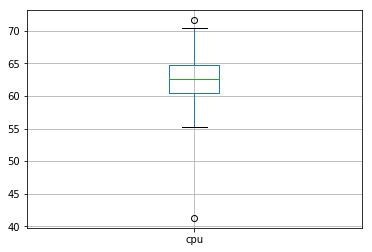

In [199]:
nottem["cpu"].plot.box(grid='True')

In [253]:
nottem_decomp = decompose(nottem.cpu, period=30)
nottem_decomp.resid.head()

datetime
2018-01-01    1.656401
2018-01-02    2.973268
2018-01-03    0.903572
2018-01-04    2.398185
2018-01-05    1.679059
Name: cpu, dtype: float64

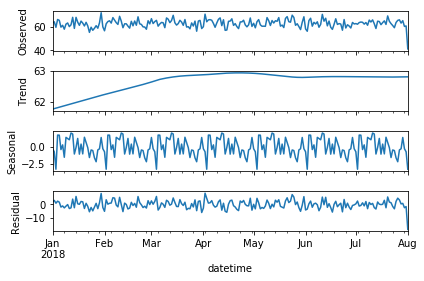

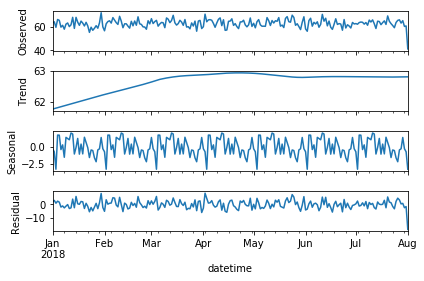

In [254]:
nottem_decomp.plot()

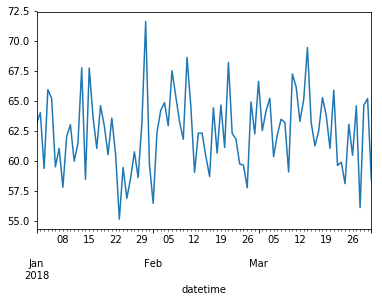

In [256]:
nottem_decomp.observed["2018-01-01":"2018-03-31"].plot()

In [257]:
nottem_decomp.resid.std()

3.1367130660177813

In [258]:
q1, q3= np.percentile(nottem_decomp.resid,[25,75])
print("q1 : ",q1,"q3 : ",q3)

q1 :  -2.133631100352424 q3 :  1.9622650620080164


In [259]:
iqr = q3 - q1
print("IQR : ",iqr)

IQR :  4.09589616236044


In [260]:
lower_bound = q1 -(1.5 * iqr) 

In [261]:
lower_bound

-8.277475343893085

In [262]:
upper_bound = q3 +(1.5 * iqr)

In [263]:
upper_bound

8.106109305548678

In [264]:
nottem_decomp.resid[nottem_decomp.resid>upper_bound].count()

1

In [265]:
nottem_decomp.resid[nottem_decomp.resid<lower_bound].count()

1

In [266]:
Outliers=nottem_decomp.resid[(nottem_decomp.resid>upper_bound) | (nottem_decomp.resid<lower_bound)]

In [267]:
Outliers

datetime
2018-04-02     8.250486
2018-08-01   -18.238685
Name: cpu, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


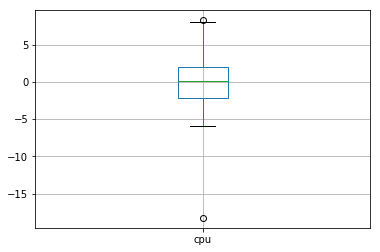

In [268]:
nottem_decomp.resid.plot.box(grid='True')

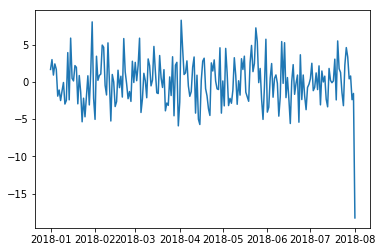

In [269]:
plt.plot(nottem_decomp.resid)

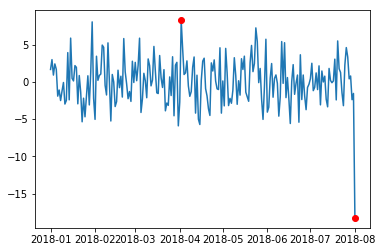

In [270]:
plt.plot(nottem_decomp.resid)
plt.plot(Outliers,'ro')